/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_27431/949950160.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


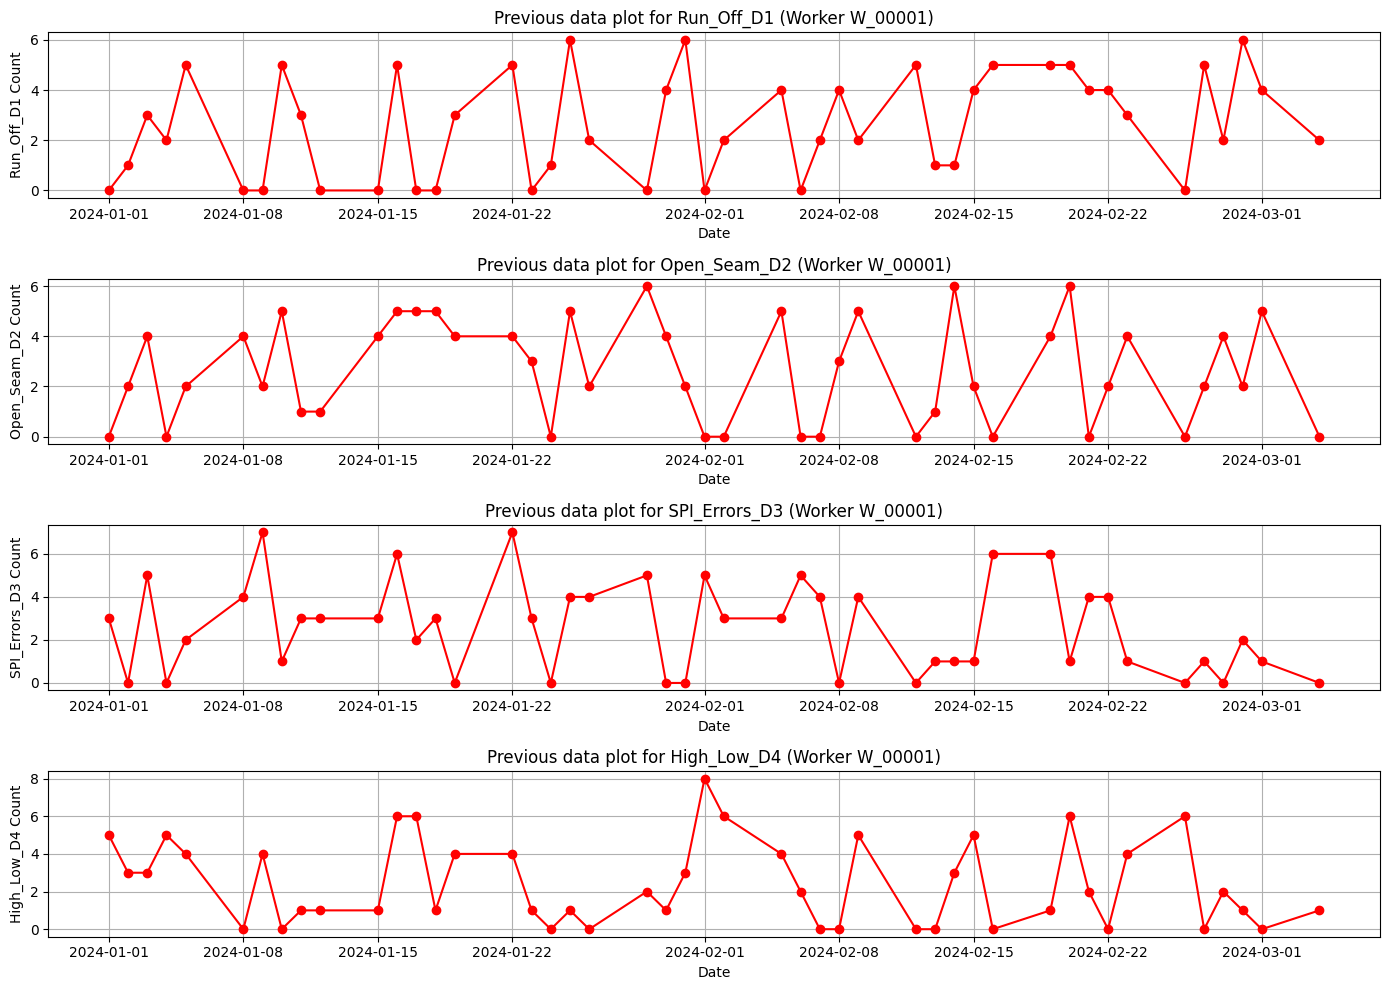

High defect type for worker W_00001: Run_Off_D1
Low defect type for worker W_00001: High_Low_D4

Worker W_00001 - Last week's high defect type: Run_Off_D1 with count: 19
Worker W_00001 - Last week's low defect type: SPI_Errors_D3 with count: 4

Training ARIMA model for Run_Off_D1 (Worker W_00001)...
RMSE for Run_Off_D1 (Worker W_00001): 1.6917517265544044


/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_27431/949950160.py:53: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_week_data = worker_data.last('7D')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


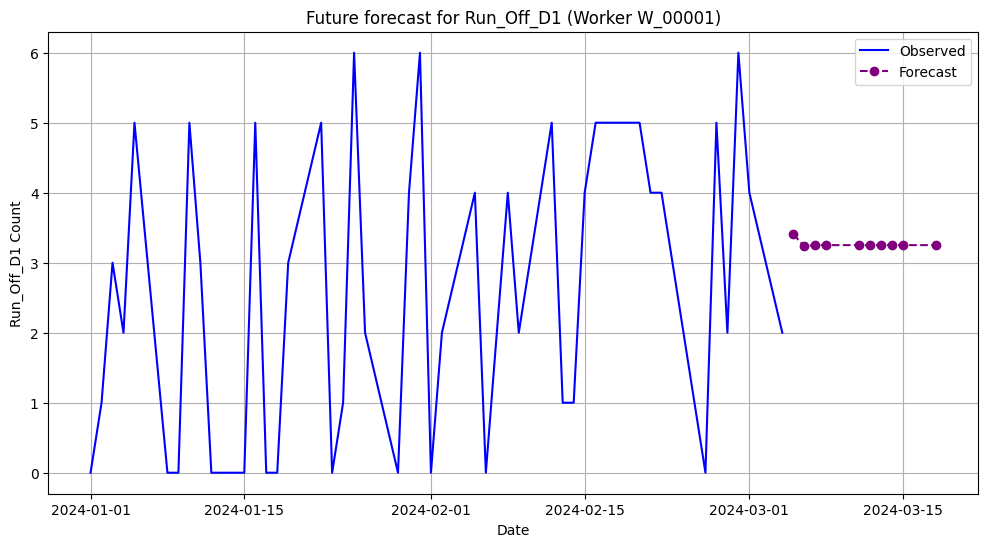

                               SARIMAX Results                                
Dep. Variable:             Run_Off_D1   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -97.809
Date:                Sat, 29 Jun 2024   AIC                            201.617
Time:                        14:50:54   BIC                            207.037
Sample:                    01-01-2024   HQIC                           203.638
                         - 03-04-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1252      0.186     -0.673      0.501      -0.490       0.240
ma.L1         -0.9071      0.101     -8.944      0.000      -1.106      -0.708
sigma2         4.3300      1.392      3.112      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


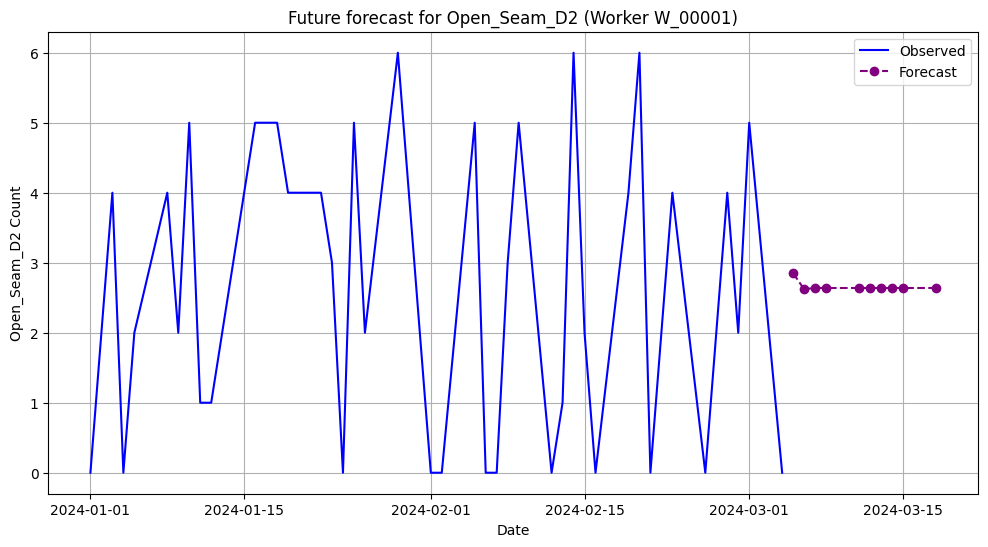

                               SARIMAX Results                                
Dep. Variable:           Open_Seam_D2   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -98.127
Date:                Sat, 29 Jun 2024   AIC                            202.253
Time:                        14:50:54   BIC                            207.673
Sample:                    01-01-2024   HQIC                           204.274
                         - 03-04-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0797      0.166     -0.480      0.631      -0.405       0.246
ma.L1         -0.9997     16.231     -0.062      0.951     -32.813      30.813
sigma2         4.2002     68.295      0.062      0.9

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


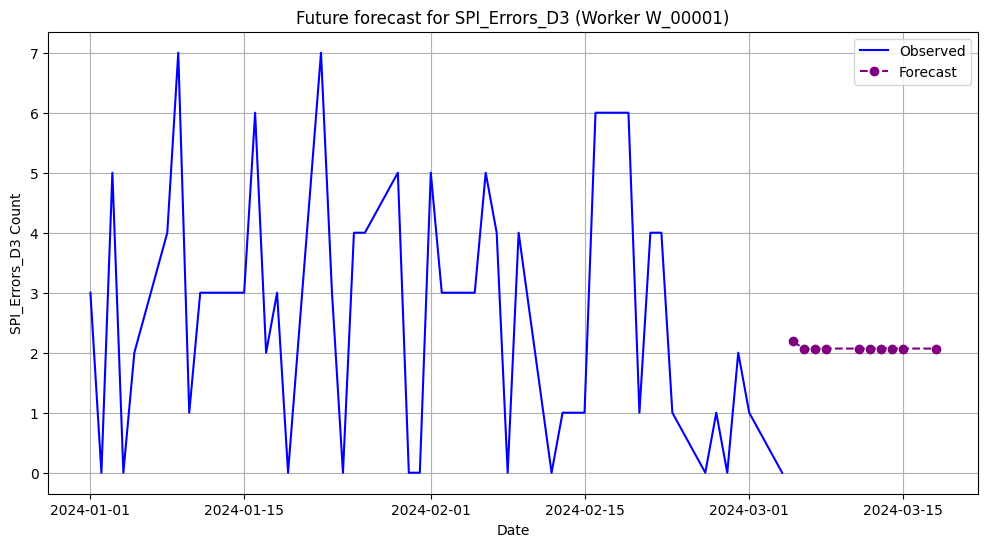

                               SARIMAX Results                                
Dep. Variable:          SPI_Errors_D3   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -99.928
Date:                Sat, 29 Jun 2024   AIC                            205.857
Time:                        14:50:54   BIC                            211.277
Sample:                    01-01-2024   HQIC                           207.877
                         - 03-04-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0574      0.170     -0.337      0.736      -0.391       0.277
ma.L1         -0.9312      0.142     -6.552      0.000      -1.210      -0.653
sigma2         4.7406      1.663      2.850      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


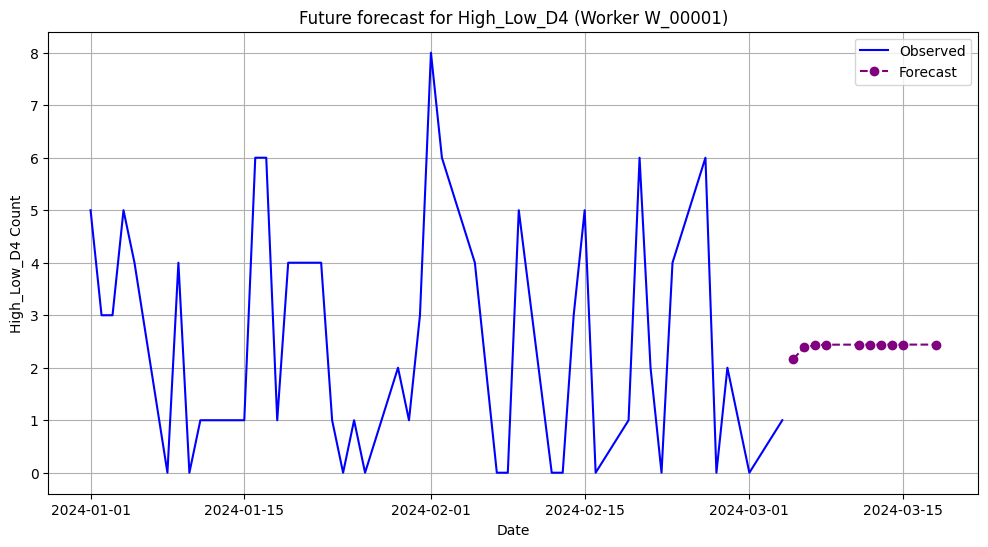

                               SARIMAX Results                                
Dep. Variable:            High_Low_D4   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -101.612
Date:                Sat, 29 Jun 2024   AIC                            209.225
Time:                        14:50:54   BIC                            214.645
Sample:                    01-01-2024   HQIC                           211.245
                         - 03-04-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1902      0.169      1.128      0.259      -0.140       0.521
ma.L1         -0.9998     37.132     -0.027      0.979     -73.776      71.777
sigma2         4.9613    184.650      0.027      0.9

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
df = pd.read_csv('/Users/minu/Desktop/MAS-Streamlit/Dataset/updated_worker_defect_details.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# List of defect types
defect_types = ['Run_Off_D1', 'Open_Seam_D2', 'SPI_Errors_D3', 'High_Low_D4']

# Prompt user to select a worker ID
worker_id = input("Enter the Worker ID: ")

# Filter the data for the selected worker ID
worker_data = df[df['Worker_ID'] == worker_id]

if worker_data.empty:
    print(f"No data found for worker {worker_id}.")
else:
    # Plotting time series for each defect type for the selected worker
    plt.figure(figsize=(14, 10))
    for i, defect_type in enumerate(defect_types, 1):
        plt.subplot(len(defect_types), 1, i)
        plt.plot(worker_data.index, worker_data[defect_type], marker='o', linestyle='-', color='red')
        plt.title(f'Previous data plot for {defect_type} (Worker {worker_id})')
        plt.xlabel('Date')
        plt.ylabel(f'{defect_type} Count')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate summary statistics for each defect type for the selected worker
    summary_stats = worker_data[defect_types].agg(['mean', 'sum']).transpose()

    # Determine high and low defect types for the selected worker
    high_defect_type = summary_stats['mean'].idxmax()
    low_defect_type = summary_stats['mean'].idxmin()

    print(f"High defect type for worker {worker_id}: {high_defect_type}")
    print(f"Low defect type for worker {worker_id}: {low_defect_type}")

    print()

    # Calculate last week's high and low defect counts for the selected worker
    last_week_data = worker_data.last('7D')
    last_week_summary = last_week_data[defect_types].sum()
    last_week_high_defect_type = last_week_summary.idxmax()
    last_week_low_defect_type = last_week_summary.idxmin()
    last_week_high_defect_count = last_week_summary.max()
    last_week_low_defect_count = last_week_summary.min()

    print(f"Worker {worker_id} - Last week's high defect type: {last_week_high_defect_type} with count: {last_week_high_defect_count}")
    print(f"Worker {worker_id} - Last week's low defect type: {last_week_low_defect_type} with count: {last_week_low_defect_count}")

    print()

    # Train ARIMA models and make forecasts for each defect type for the selected worker
    forecast_steps = 10  # Number of steps to forecast into the future (2 weeks of business days)

    def train_arima_model(data, order=(1, 1, 1), steps=10):
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=steps)
        return model_fit, forecast

    def calculate_rmse(observed, forecast):
        mse = mean_squared_error(observed, forecast)
        rmse = np.sqrt(mse)
        return rmse

    for defect_type in defect_types:
        print(f"Training ARIMA model for {defect_type} (Worker {worker_id})...")
        model_fit, forecast = train_arima_model(worker_data[defect_type], steps=forecast_steps)

        # Calculate RMSE
        if len(worker_data[defect_type]) >= forecast_steps:
            rmse = calculate_rmse(worker_data[defect_type][-forecast_steps:], forecast)
            print(f"RMSE for {defect_type} (Worker {worker_id}): {rmse}")

        # Plotting the results
        plt.figure(figsize=(12, 6))
        plt.plot(worker_data.index, worker_data[defect_type], label='Observed', color='blue')
        future_dates = pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
        plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
        plt.title(f'Future forecast for {defect_type} (Worker {worker_id})')
        plt.xlabel('Date')
        plt.ylabel(f'{defect_type} Count')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Print model summary
        print(model_fit.summary())